# ML_Question_1

In [1]:
# Import required libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')

##### Load Dataset

In [75]:
df = pd.read_csv("instagram_reach.csv")

In [76]:
# checking top rows of dataset
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


#### Checking number of rows and columns in dataset

In [5]:
df.shape


(100, 8)

#### Checking name of the columns

In [77]:
df.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

#### Cheking detail informatinon of datsset

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


#### Deleting unnecessary columns

In [79]:
df=df.drop(['Unnamed: 0', 'S.No'],axis=1)

#### Converting Time columns as integer datatype


In [80]:
df['Time since posted'] = df['Time since posted'].str.replace('hours', '')
df['Time since posted'] = df['Time since posted'].astype(int)
df = df.rename(columns={'Time since posted': 'Time since posted (hours)'})

#### Checking datatype of columns 

In [81]:
df.dtypes

USERNAME                     object
Caption                      object
Followers                     int64
Hashtags                     object
Time since posted (hours)     int32
Likes                         int64
dtype: object

#### Checking missing values in dataset

In [82]:
df.isnull().sum()

USERNAME                     0
Caption                      6
Followers                    0
Hashtags                     0
Time since posted (hours)    0
Likes                        0
dtype: int64

#### Dropping missing values in dataset

In [83]:
df=df.dropna()

## Performing EDA and finding insights of Instagram Reach

#### Checkning correlation between features

In [84]:
df.corr()

,Followers,Time since posted (hours),Likes
Followers,1.000000,0.265371,0.278040
Time since posted (hours),0.265371,1.000000,0.609534
Likes,0.278040,0.609534,1.000000


#### Heatmap of correlations of features

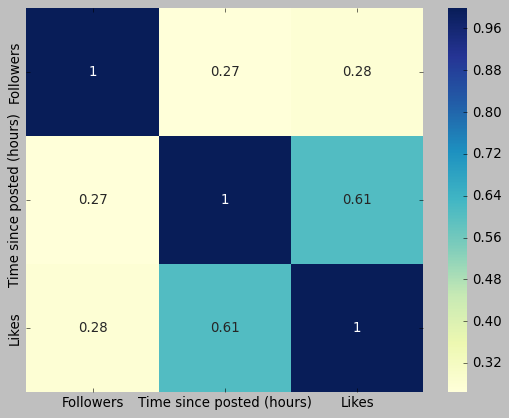

In [85]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

#### Distribution of Impressions From Followers

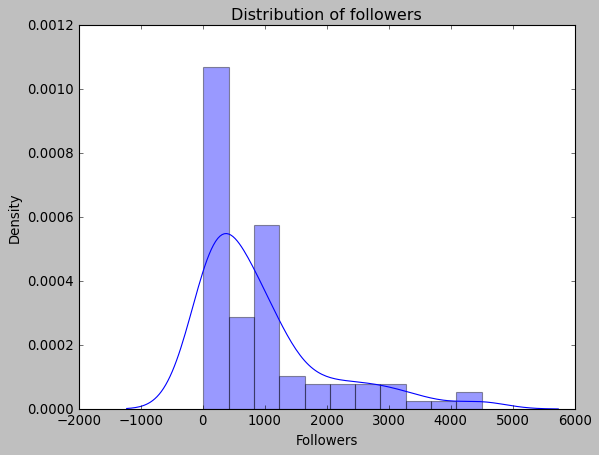

In [86]:
plt.figure(figsize=(8, 6))
sns.distplot(df['Followers'])
plt.title("Distribution of followers")
plt.show()

#### Plotting Word-Cloud for caption related data


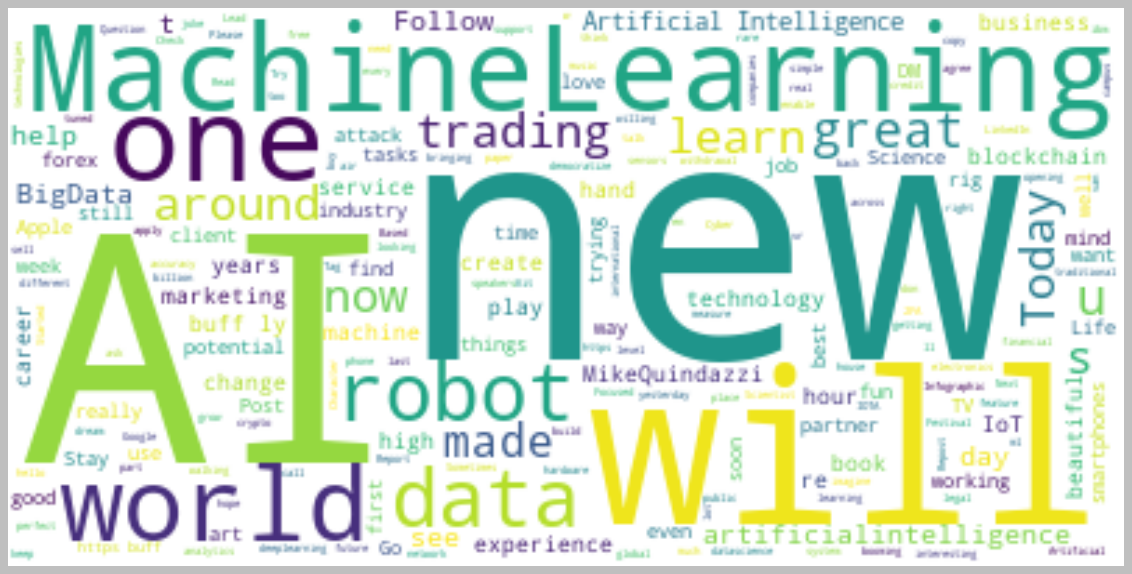

In [57]:
text = " ".join(i for i in df.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(18,16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Plotting Word-Cloud for Hashtag Related Data


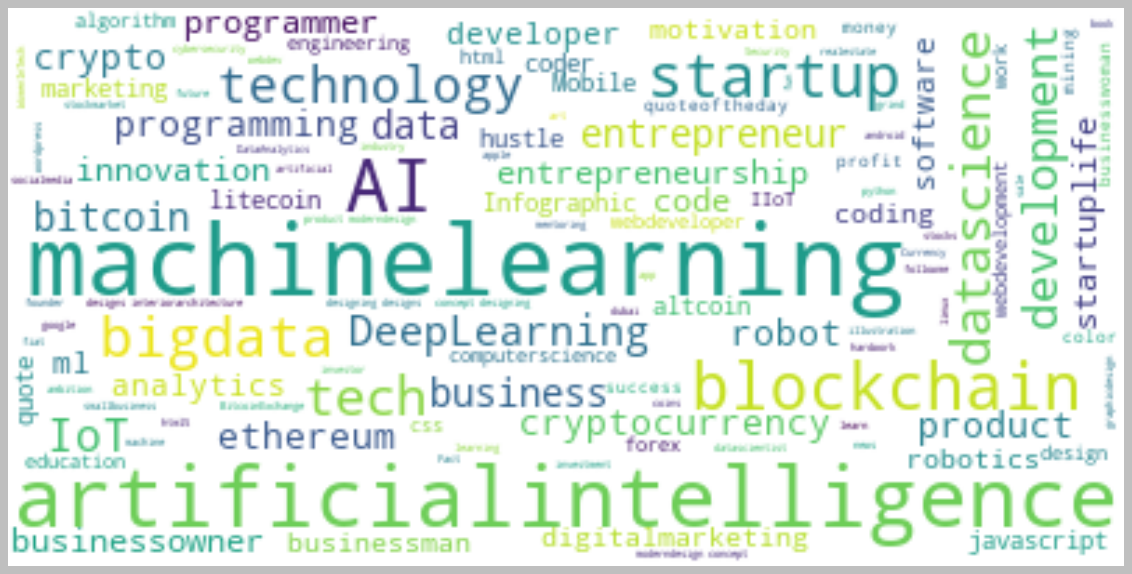

In [39]:
text = " ".join(i for i in df.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(18,16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Plotting Scatter-plot for showing Relationship Between Likes and Time since posted

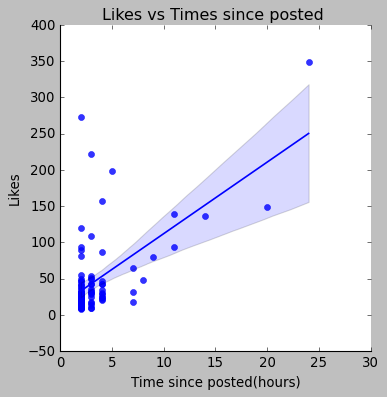

In [64]:
sns.lmplot(x='Time since posted (hours)', y='Likes', data=df, fit_reg=True, scatter_kws={"marker": "D", "s": 30})

plt.title('Likes vs Times since posted ')
plt.xlabel('Time since posted(hours)')
plt.ylabel('Likes')
plt.show()

#### Plotting Scatter-plot for showing Relationship Between Likes and Followers 

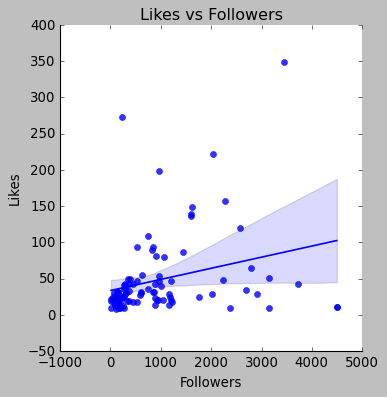

In [65]:
sns.lmplot(x='Followers', y='Likes', data=df, fit_reg=True, scatter_kws={"marker": "D", "s": 30})

plt.title('Likes vs Followers')
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.show()

## Model Building

#### Splitting inpute features and target features

In [66]:
input_features = ['USERNAME', 'Caption', 'Hashtags', 'Followers']
target_likes = 'Likes'
target_time_since_posted = 'Time since posted (hours)'

In [ ]:
X = df[input_features]
y_likes = df[target_likes]
y_time_since_posted = df[target_time_since_posted]
X_train, X_test, y_likes_train, y_likes_test, y_time_since_posted_train, y_time_since_posted_test = train_test_split(X, y_likes, y_time_since_posted, test_size=0.2, random_state=42)

#### Preprocess the text features using one-hot encoding

In [90]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

#### Train a model to predict the number of likes

In [72]:
likes_model = LinearRegression()
likes_model.fit(X_train_encoded, y_likes_train)
likes_predictions = likes_model.predict(X_test_encoded)
likes_mse = mean_squared_error(y_likes_test, likes_predictions)
print("Mean Squared Error (Likes):", likes_mse)

Mean Squared Error (Likes): 1769.710912389252


#### Train a model to predict the time since posted

In [73]:

time_since_posted_model = LinearRegression()
time_since_posted_model.fit(X_train_encoded, y_time_since_posted_train)
time_since_posted_predictions = time_since_posted_model.predict(X_test_encoded)
time_since_posted_mse = mean_squared_error(y_time_since_posted_test, time_since_posted_predictions)
print("Mean Squared Error (Time Since Posted):", time_since_posted_mse)

Mean Squared Error (Time Since Posted): 13.192419971206911
